In [2]:
import sys
sys.path.append("..")

In [3]:
from pathlib import Path
root_path = Path().resolve()
print(root_path)

/Users/seobi/PythonProjects/RAG_Commander/src/lab


In [3]:
from utils.util import get_project_root
get_project_root()

PosixPath('/Users/seobi/PythonProjects/RAG_Commander')

In [4]:
from prompts import PromptType
PromptType.MAIN_START_CONFIRMATION.path

'/Users/seobi/PythonProjects/RAG_Commander/src/prompts/main.yaml'

In [5]:
from prompts import PromptManager
PromptManager(PromptType.MAIN_START_CONFIRMATION).get_prompt(messages = [])

'아래는 지금까지 사용자가 부동산 대행사 사내용 보고서 작성을 요청하며 주고 받은 메시지 입니다. \n<Messages>\n[]\n</Messages>\n\n사용자가 제공한 정보만으로 보고서 작성을 시작할 수 있는지,\n아니면 추가로 질문을 해야 하는지 판단해야 합니다.\n\n보고서 작성 여부는 아래와 같습니다.\n** 위치, 규모, 세대수 ** 중 1가지라도 없다면 필수로 명확하기 위한 질문을 해야합니다. \n\n중요: 만약 이미 명확히 하기 위한 질문을 한적이 없다면,\n다시 질문하지마세요. 정말 필요할 떄만 새로 질문을 하세요. \n\n약어나 모호한 용어, 의미 불분명한 표헌이 있다면 사용자가 명확히 해주도록 요청하십시오.\n\n질문이 필요한 경우 다음 가이드를 따르세요:\n- 불필요한 장황함 없이 필요한 정보만 간결히 물어보세요.\n- 보고서 작성에 꼭 필요한 모든 정보를 잘 구조화해 요청하세요. \n- 필요하다면 마크다운 서식이 적용되는 **리스트나 번호 목록**으로 작성하세요. \n- 이미 사용자가 제공한 정보를 반복해서 묻지 마세요. \n\n다음과 같은 JSON 형식으로 응답해야 합니다:\n"confirm": boolean, \n"question": "<사용자에게 명확하기 위한 질문>",\n"reason": "<사용자에게 명확하기 위한 질문이 필요한 이유>"\n"verification": "<충분한 정보가 있을 때 보고서 작성 시작을 알리는 메시지>"\n\n명확하기 위한 질문이 필요한 경우:\n"confirm": False, \n"question": "<당신의 질문>",\n"reason": "<사용자에게 명확하기 위한 질문이 필요한 이유>"\n"verification": ""\n\n\n명확하기 위한 질문이 **필요하지 않은 경우*:\n"confirm": True, \n"question": "",\n"reason": ""\n"verification": "<보고서 작성을 시작하겠다는 확인 메시지>"\n\nverfication 메시지 작성 규칙:\n- 

In [6]:
# import yaml

# with open("../prompts/insight_division_prompts.yaml", "r", encoding="utf-8") as f:
#     config = yaml.safe_load(f)

# print(config["agents"][0]["system"])
# common_system = config["common_system"]  
# agents = config["agents"]                
# loc_cfg = next(a for a in agents if a["id"] == "location_insight")
# loc_cfg

/Users/seobi/PythonProjects/RAG_Commander/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


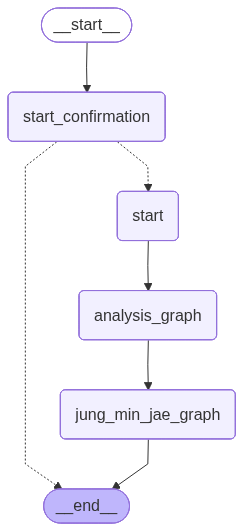

In [7]:
from agents.main.main_agent import graph_builder
graph_builder.compile()

/Users/seobi/PythonProjects/RAG_Commander/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


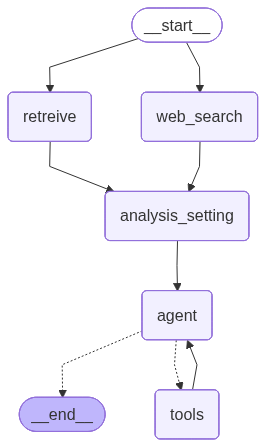

In [4]:
from agents.analysis.economic_insight_agent import economic_insight_graph
economic_insight_graph

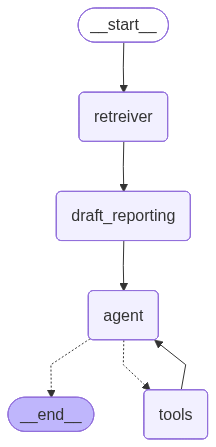

In [9]:
from agents.jung_min_jae.jung_min_jae_agent import report_graph
report_graph

In [ ]:
# from langchain.chat_models import init_chat_model
# from utils.llm import LLMProfile, ModelName
# model = init_chat_model(
#     model=ModelName.GPT_5, temperature=0,
#         reasoning_effort="high",      
#         verbosity="high"
#     )
# result = model.invoke("모델 테스트")
# result 

In [11]:
from dotenv import load_dotenv
from perplexity import Perplexity
load_dotenv()
client = Perplexity()
search = client.search.create(
    query=[
        """대한민국 수도권 아파트 분양가 및 미분양 리스크를 거시경제 관점에서 정밀히 진단하기 위해 검색해주세요.""",
        """반드시 2025년 10월 기준으로 찾아주세요.
        다음 거시환경 요소들에 대해 최근 3년(2023-2025) 또는 최신 가능 연도 기준으로 한국(특히 수도권) 데이터를 활용해 분석해 주세요:  
        • 기준금리 및 주택담보대출 금리 추이  
        • 국내 GDP 성장률 및 산업생산지수 변화  
        • 주택 매매가·전세가 인덱스 시계열 변화  
        • 금융시장(예: 채권금리, 주가지수) 및 심리지표 변화  
        분석 결과가 아파트 분양가 및 미분양 리스크에 어떤 영향을 줄 수 있는지 서론·본론·결론 구조로 설명해 주세요""",
    ]
)
search

SearchCreateResponse(id='60e28f2b-238c-4398-ae5e-ee06df1302b1', results=[Result(snippet='주택을 감소시키는 것을 의미한다. 둘째, 주택월세가격이 상승할수록 수도권과 비수도권의 준공 후 \n미분양 주택을 증가시키는 것으로 나타났으며, 미분양 주택보다는 준공 후 미분양주택에 부정적인 \n영향을 미치는 것으로 나타났다. 셋째, 준공 후 미분양 주택의 발생이 수도권보다는 지방에서 더욱 \n민감하게 반응하고 있어 지방을 중심으로 지역 맞춤형 정책 수립이 필요하다. 따라서, 본 연구를 통해 \n미분양 주택을 해소하기 위한 지역 맞춤형 정책을 수립하는 데 참고 자료로 활용될 것으로 기대한다.\n핵심어 : 미분양 주택, 준공 후 미분양 주택, 주택매매가격, 주택월세가격, 주택공급\nⅠ. 서론\n1. 연구의 배경 및 목적\n국토교통부에서 발표하는 2024년 10월 주택통계에 따르면 우리나라의 미분양 주택은 2020년 \n* 이 논문은 허준명의 2024년 석사논문을 수정 ․ 보완하였습니다.\n** 이호일, 주저자, 건국대학교 부동산학과 박사, hoillee1202@gmail.com\n*** 허준명, 공동저자, 한국식품안전관리인증원 연구원, et408@naver.com\n**** 노승한, 교신저자, 건국대학교 부동산학과 교수, shro@konkuk.ac.kr\n© Copyright 2024 Housing Finance Research Institute. This is an Open Access article distributed under the terms of the Creative Commons \nAttribution Non-Commercial License (http://creativecommons.org/licenses/by-nc/4.0/) which permits unrestricted non-commercial use, \ndistribution, and reproduction in any medi

In [12]:
print(search)

SearchCreateResponse(id='60e28f2b-238c-4398-ae5e-ee06df1302b1', results=[Result(snippet='주택을 감소시키는 것을 의미한다. 둘째, 주택월세가격이 상승할수록 수도권과 비수도권의 준공 후 \n미분양 주택을 증가시키는 것으로 나타났으며, 미분양 주택보다는 준공 후 미분양주택에 부정적인 \n영향을 미치는 것으로 나타났다. 셋째, 준공 후 미분양 주택의 발생이 수도권보다는 지방에서 더욱 \n민감하게 반응하고 있어 지방을 중심으로 지역 맞춤형 정책 수립이 필요하다. 따라서, 본 연구를 통해 \n미분양 주택을 해소하기 위한 지역 맞춤형 정책을 수립하는 데 참고 자료로 활용될 것으로 기대한다.\n핵심어 : 미분양 주택, 준공 후 미분양 주택, 주택매매가격, 주택월세가격, 주택공급\nⅠ. 서론\n1. 연구의 배경 및 목적\n국토교통부에서 발표하는 2024년 10월 주택통계에 따르면 우리나라의 미분양 주택은 2020년 \n* 이 논문은 허준명의 2024년 석사논문을 수정 ․ 보완하였습니다.\n** 이호일, 주저자, 건국대학교 부동산학과 박사, hoillee1202@gmail.com\n*** 허준명, 공동저자, 한국식품안전관리인증원 연구원, et408@naver.com\n**** 노승한, 교신저자, 건국대학교 부동산학과 교수, shro@konkuk.ac.kr\n© Copyright 2024 Housing Finance Research Institute. This is an Open Access article distributed under the terms of the Creative Commons \nAttribution Non-Commercial License (http://creativecommons.org/licenses/by-nc/4.0/) which permits unrestricted non-commercial use, \ndistribution, and reproduction in any medi